In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing ,svm
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline

In [2]:
df_L=pd.read_csv('heart.csv')
df_L.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df_L.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
xl = np.asanyarray(df_L[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']])
yl = np.asanyarray(df_L['output'])

In [6]:
train_xl , test_xl , train_yl , test_yl = train_test_split(xl ,yl ,test_size=0.2 ,random_state=4)

In [7]:
lheart = LogisticRegression(C=0.1 ,solver='newton-cg').fit(train_xl, train_yl)
lheart

LogisticRegression(C=0.1, solver='newton-cg')

In [8]:
ylhat = lheart.predict(test_xl)
lf1_score= metrics.f1_score(test_yl , ylhat)
lacc_score = metrics.accuracy_score(test_yl , ylhat)
lf2_score = metrics.fbeta_score(test_yl , ylhat, beta=2, average='weighted')
print(f'accuracy score:{lacc_score}')
print(f'f1 score:{lf1_score}')
print(f'f2 score:{lf2_score}')

accuracy score:0.9180327868852459
f1 score:0.9333333333333333
f2 score:0.9170921795216339


In [9]:

def plot_confusion_matrixl(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(metrics.confusion_matrix(test_yl, ylhat, labels=[1,0]))

[[35  1]
 [ 4 21]]


Confusion matrix, without normalization
[[35  1]
 [ 4 21]]


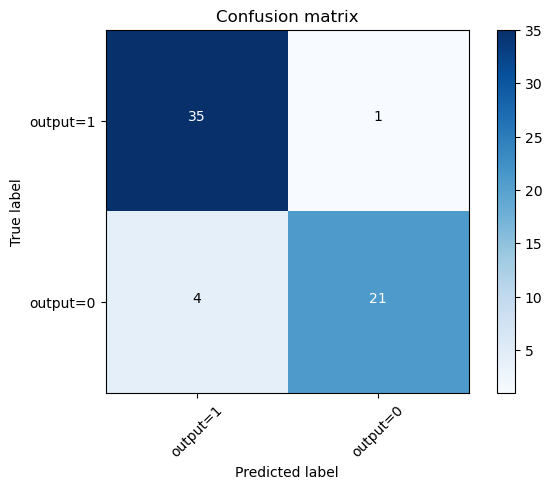

In [10]:
cnf_matrixl = metrics.confusion_matrix(test_yl, ylhat, labels=[1,0])
np.set_printoptions(precision=2)



plt.figure()
plot_confusion_matrixl(cnf_matrixl, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')
plt.show()